In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from datetime import datetime

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('./data/NvidiaStockPrice.csv')

In [2]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as the index
df.set_index('Date', inplace=True)

# Add additional features
df['Daily Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily Return'].rolling(window=30).std()

In [3]:
def basic_info(df):
    print(df.head())
    print(df.describe())
    print("Duplicate Rows:", df.duplicated().sum())
    print("Missing Values:", df.isna().sum())

basic_info(df)

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

            Daily Return  Volatility  
Date                                  
1999-01-22           NaN         NaN  
1999-01-25      0.104764         NaN  
1999-01-26     -0.077594         NaN  
1999-01-27     -0.003110         NaN  
1999-01-28     -0.003144         NaN  
              Open         High          Low        Close    Adj Close  \
count  6453.000000  6453.000000  6453.000000  6453.000000  6453.000000   
mean      6.746678     6.874758     6.6

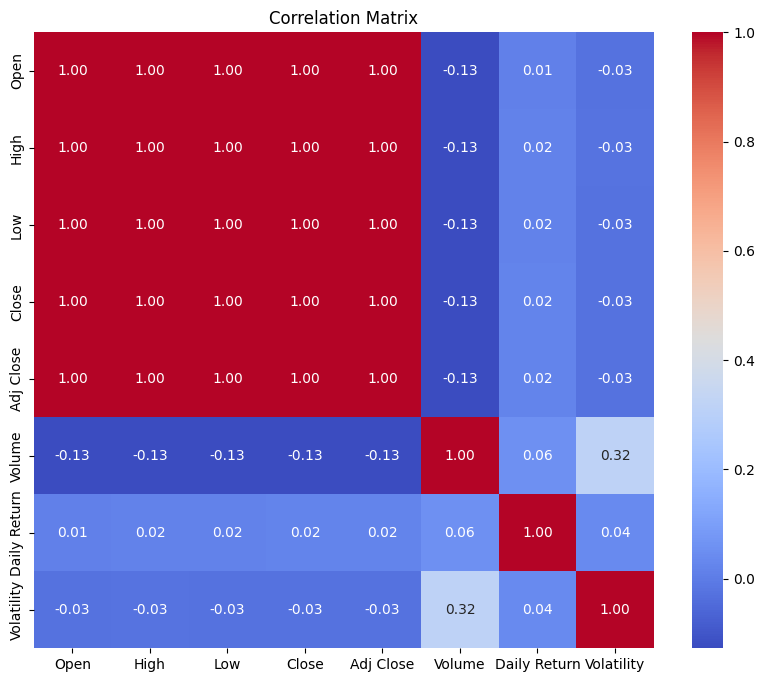

In [4]:
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)

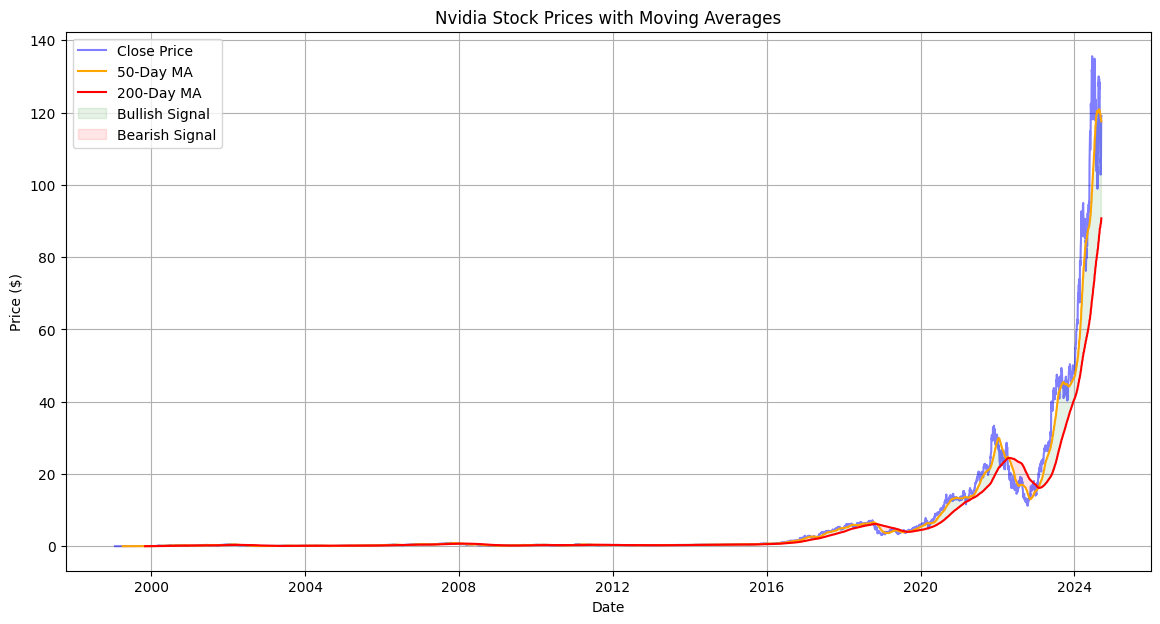

In [5]:
def plot_moving_averages(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
    df['MA50'] = df['Close'].rolling(50).mean()
    df['MA200'] = df['Close'].rolling(200).mean()
    plt.plot(df['MA50'], label='50-Day MA', color='orange')
    plt.plot(df['MA200'], label='200-Day MA', color='red')
    
    plt.fill_between(df.index, df['MA50'], df['MA200'], where=(df['MA50'] > df['MA200']), color='green', alpha=0.1, label='Bullish Signal')
    plt.fill_between(df.index, df['MA50'], df['MA200'], where=(df['MA50'] < df['MA200']), color='red', alpha=0.1, label='Bearish Signal')
    
    plt.title('Nvidia Stock Prices with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid()
    plt.show()

plot_moving_averages(df)


In [6]:
def plot_interactive(df):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
    fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], mode='lines', name='50-Day MA'))
    fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], mode='lines', name='200-Day MA'))

    fig.update_layout(title='Nvidia Stock Prices with Moving Averages',
                      xaxis_title='Date',
                      yaxis_title='Price ($)',
                      hovermode='x')
    fig.show()

plot_interactive(df)

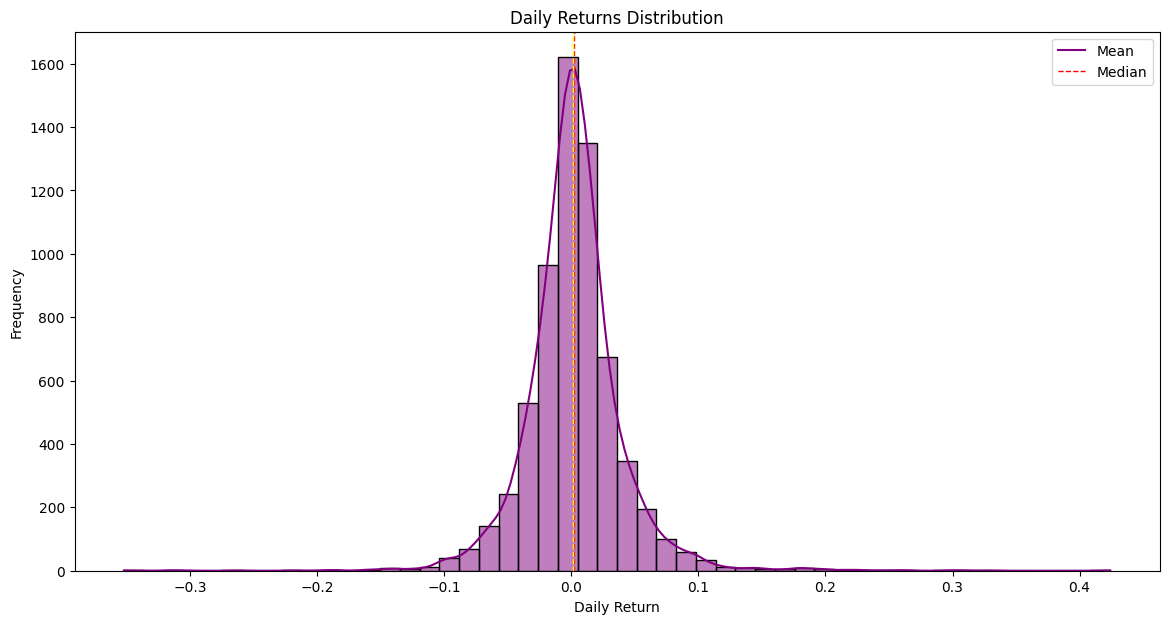

In [7]:
def plot_daily_returns(df):
    plt.figure(figsize=(14, 7))
    sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='purple')
    plt.title('Daily Returns Distribution')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.axvline(df['Daily Return'].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df['Daily Return'].median(), color='yellow', linestyle='dashed', linewidth=1)
    plt.legend({'Mean': df['Daily Return'].mean(), 'Median': df['Daily Return'].median()})
    plt.show()

plot_daily_returns(df)

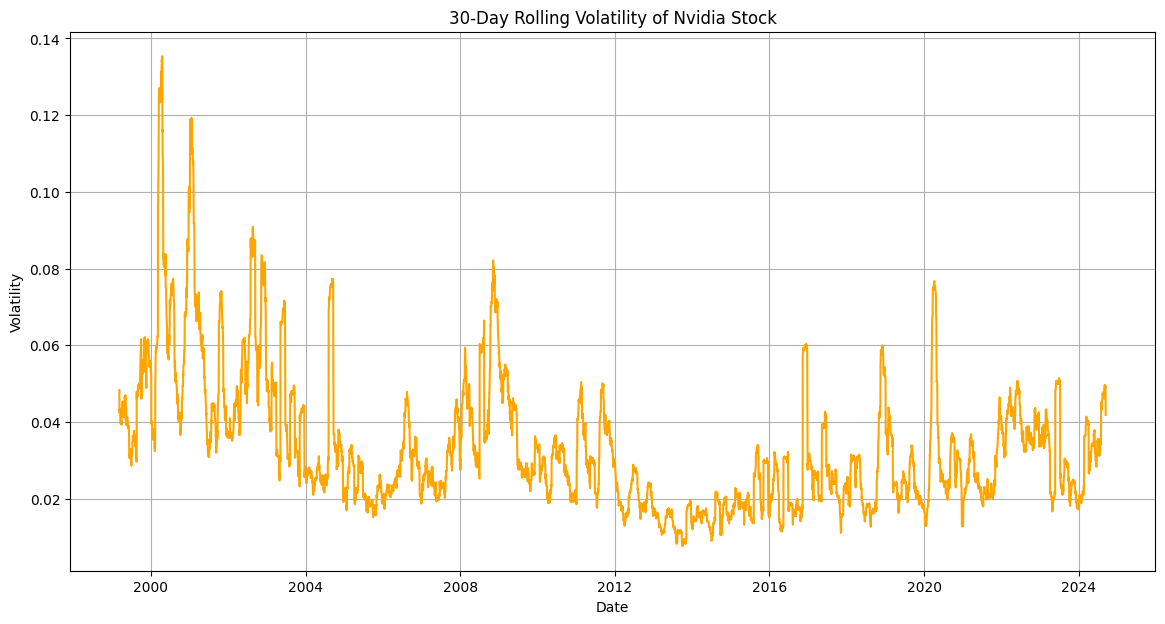

In [8]:
def plot_volatility(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Volatility'], color='orange')
    plt.title('30-Day Rolling Volatility of Nvidia Stock')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.grid()
    plt.show()

plot_volatility(df)

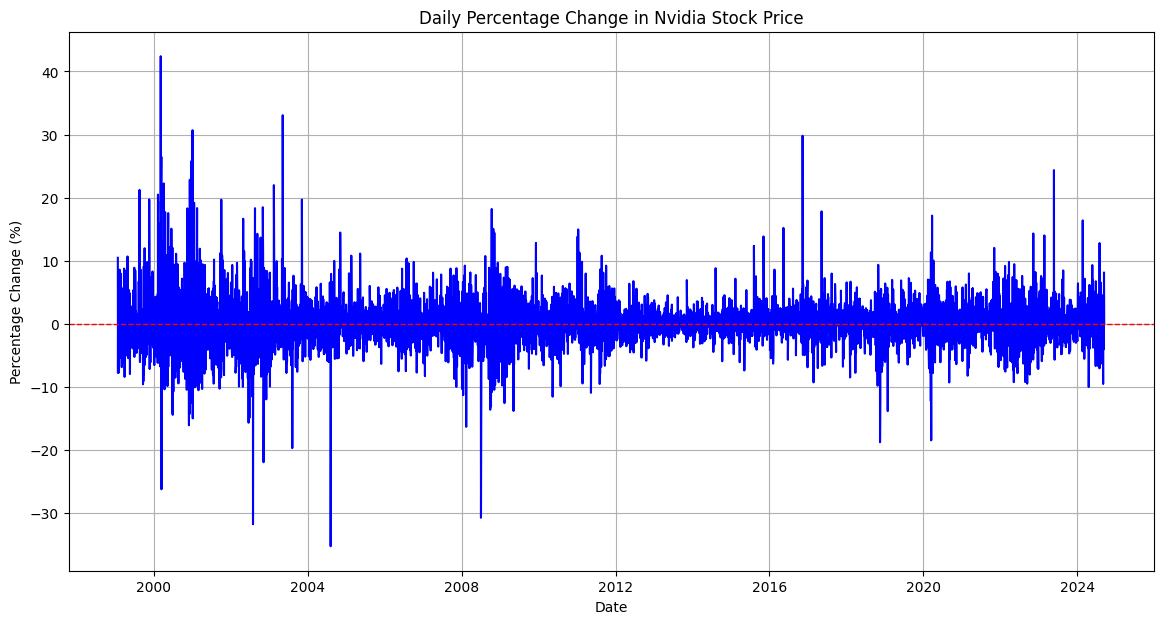

In [9]:
def plot_price_change(df):
    df['Price Change (%)'] = df['Close'].pct_change() * 100
    plt.figure(figsize=(14, 7))
    plt.plot(df['Price Change (%)'], color='blue')
    plt.title('Daily Percentage Change in Nvidia Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
    plt.grid()
    plt.show()

plot_price_change(df)

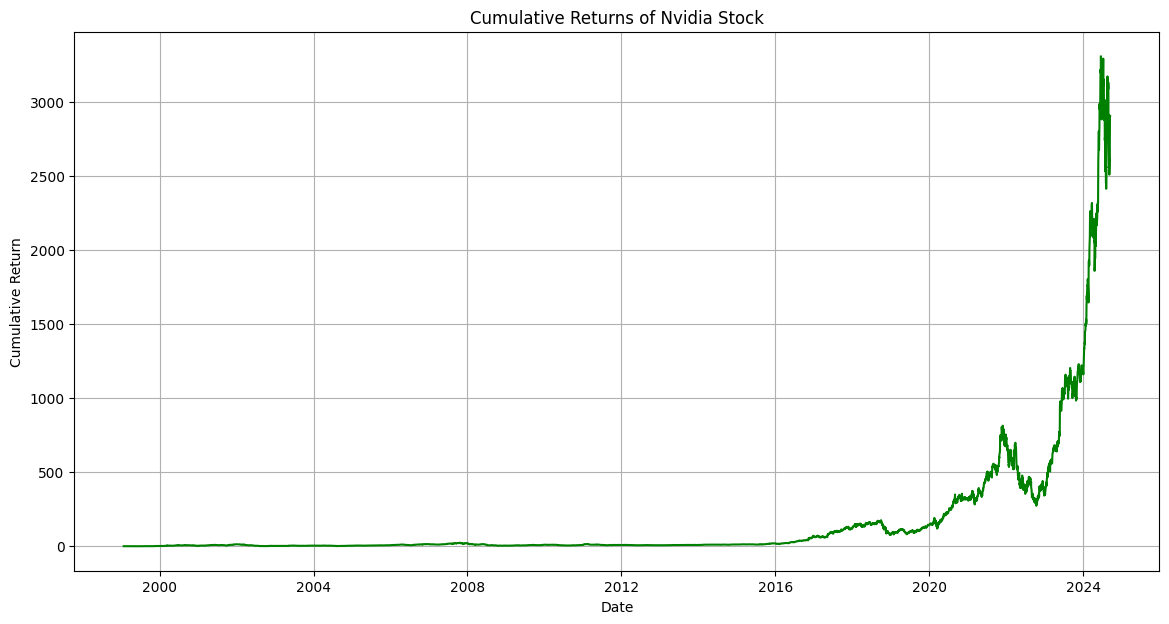

In [10]:
def plot_cumulative_returns(df):
    df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
    plt.figure(figsize=(14, 7))
    plt.plot(df['Cumulative Return'], color='green')
    plt.title('Cumulative Returns of Nvidia Stock')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid()
    plt.show()

plot_cumulative_returns(df)

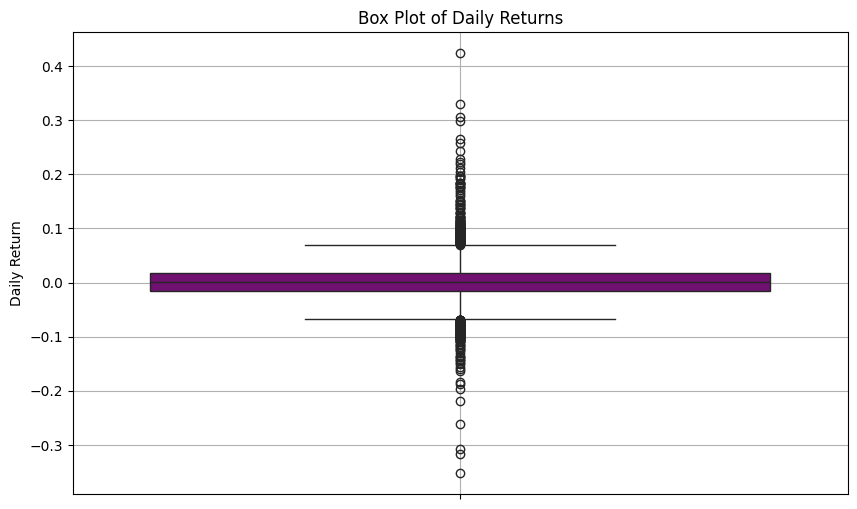

In [11]:
def plot_boxplot_daily_returns(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df['Daily Return'].dropna(), color='purple')
    plt.title('Box Plot of Daily Returns')
    plt.ylabel('Daily Return')
    plt.grid()
    plt.show()

plot_boxplot_daily_returns(df)

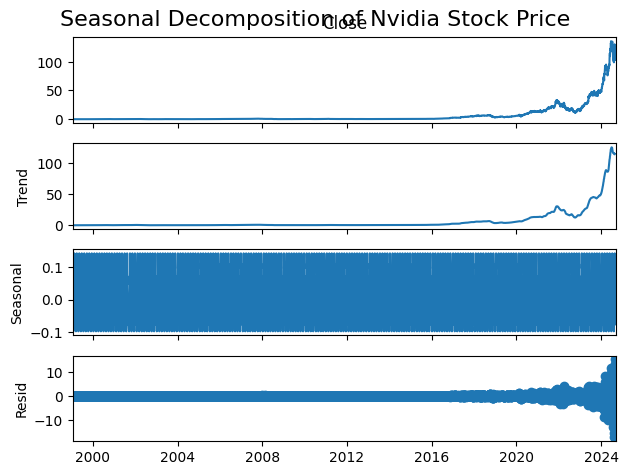

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonal_decomposition(df):
    decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
    fig = decomposition.plot()
    plt.suptitle('Seasonal Decomposition of Nvidia Stock Price', fontsize=16)
    plt.show()

plot_seasonal_decomposition(df)

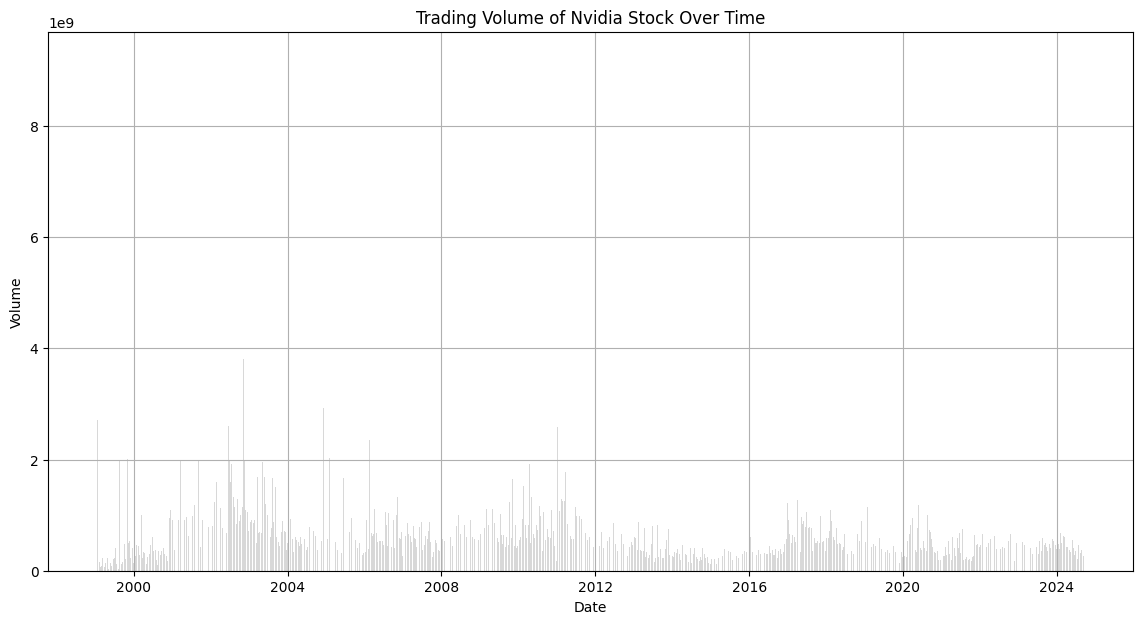

In [13]:
def plot_volume(df):
    plt.figure(figsize=(14, 7))
    plt.bar(df.index, df['Volume'], color='grey', alpha=0.3)
    plt.title('Trading Volume of Nvidia Stock Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid()
    plt.show()

plot_volume(df)

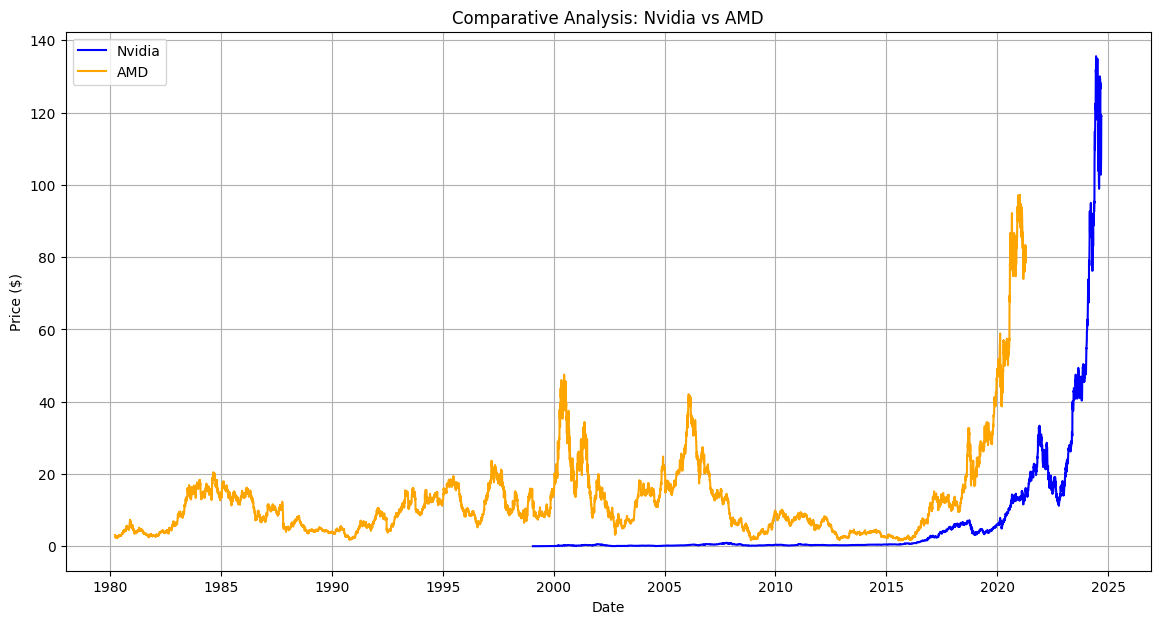

In [14]:
# Example: Comparing Nvidia with another stock, e.g., AMD
df_other = pd.read_csv('./data/AMD.csv')
df_other['Date'] = pd.to_datetime(df_other['Date'])
df_other.set_index('Date', inplace=True)

def plot_comparative_analysis(df, df_other):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Nvidia', color='blue')
    plt.plot(df_other['Close'], label='AMD', color='orange')
    plt.title('Comparative Analysis: Nvidia vs AMD')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid()
    plt.show()

plot_comparative_analysis(df, df_other)

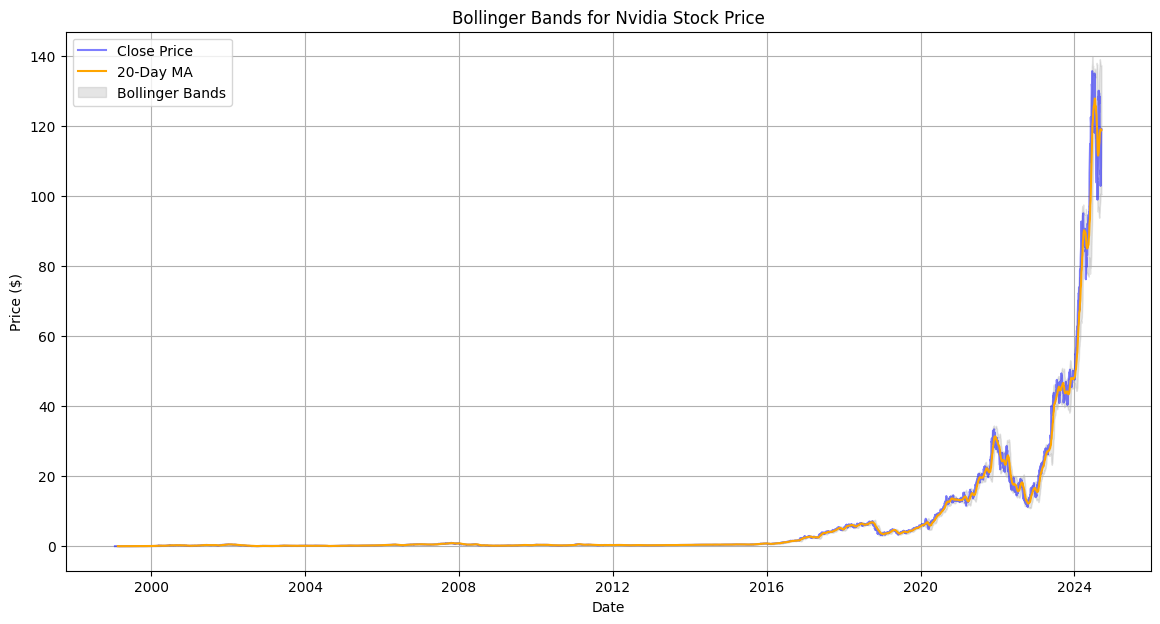

In [15]:
def plot_bollinger_bands(df):
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['Upper Band'] = df['MA20'] + (df['Close'].rolling(window=20).std() * 2)
    df['Lower Band'] = df['MA20'] - (df['Close'].rolling(window=20).std() * 2)

    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
    plt.plot(df['MA20'], label='20-Day MA', color='orange')
    plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='grey', alpha=0.2, label='Bollinger Bands')
    
    plt.title('Bollinger Bands for Nvidia Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid()
    plt.show()

plot_bollinger_bands(df)

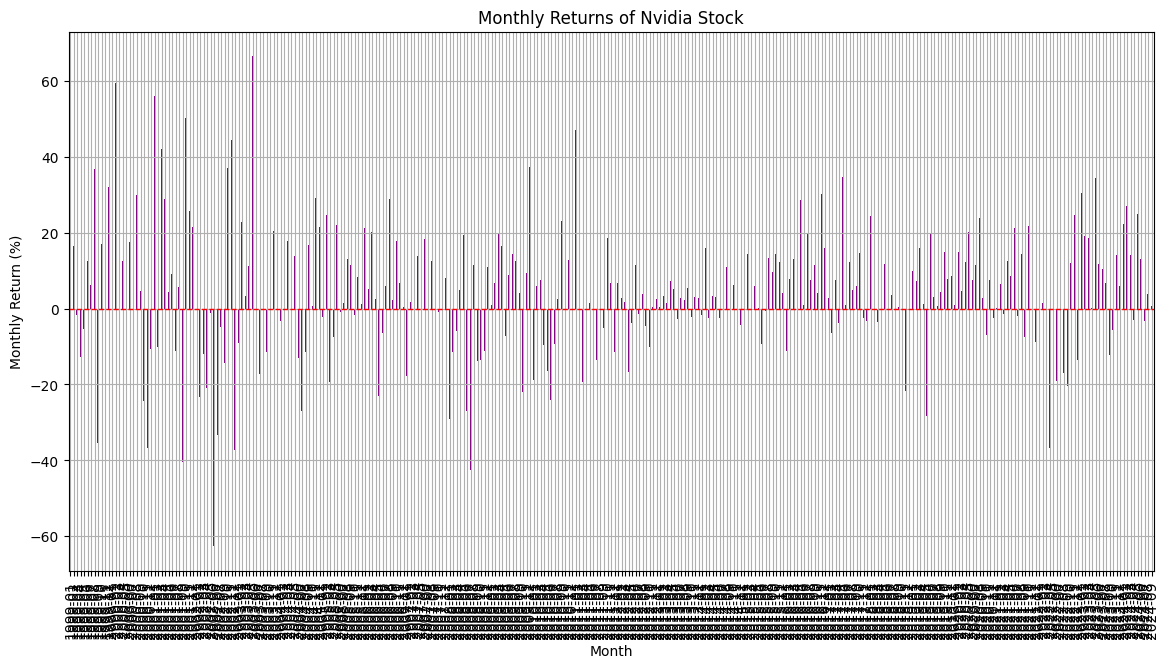

In [16]:

def plot_monthly_returns(df):
    df['Year-Month'] = df.index.to_period('M')
    monthly_returns = df.groupby('Year-Month')['Daily Return'].sum() * 100  # Convert to percentage

    plt.figure(figsize=(14, 7))
    monthly_returns.plot(kind='bar', color='purple')
    plt.title('Monthly Returns of Nvidia Stock')
    plt.xlabel('Month')
    plt.ylabel('Monthly Return (%)')
    plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
    plt.grid()
    plt.show()

plot_monthly_returns(df)

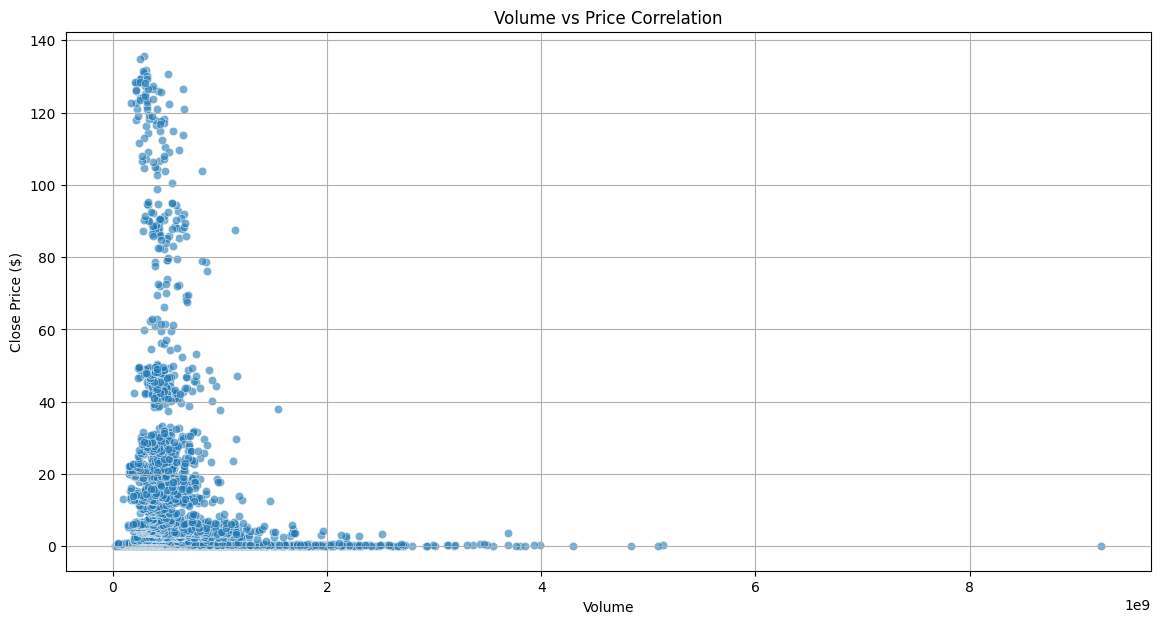

In [17]:
def plot_volume_price_correlation(df):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.6)
    plt.title('Volume vs Price Correlation')
    plt.xlabel('Volume')
    plt.ylabel('Close Price ($)')
    plt.grid()
    plt.show()

plot_volume_price_correlation(df)

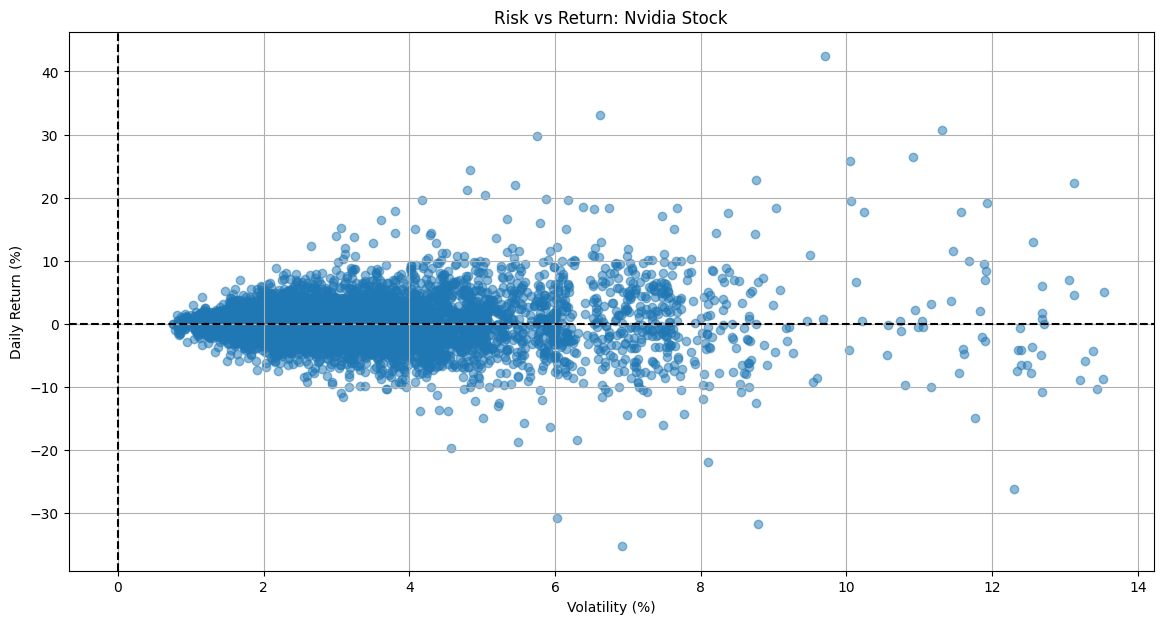

In [18]:
def plot_risk_vs_return(df):
    plt.figure(figsize=(14, 7))
    plt.scatter(df['Volatility'] * 100, df['Daily Return'] * 100, alpha=0.5)
    plt.title('Risk vs Return: Nvidia Stock')
    plt.xlabel('Volatility (%)')
    plt.ylabel('Daily Return (%)')
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    plt.grid()
    plt.show()

plot_risk_vs_return(df)

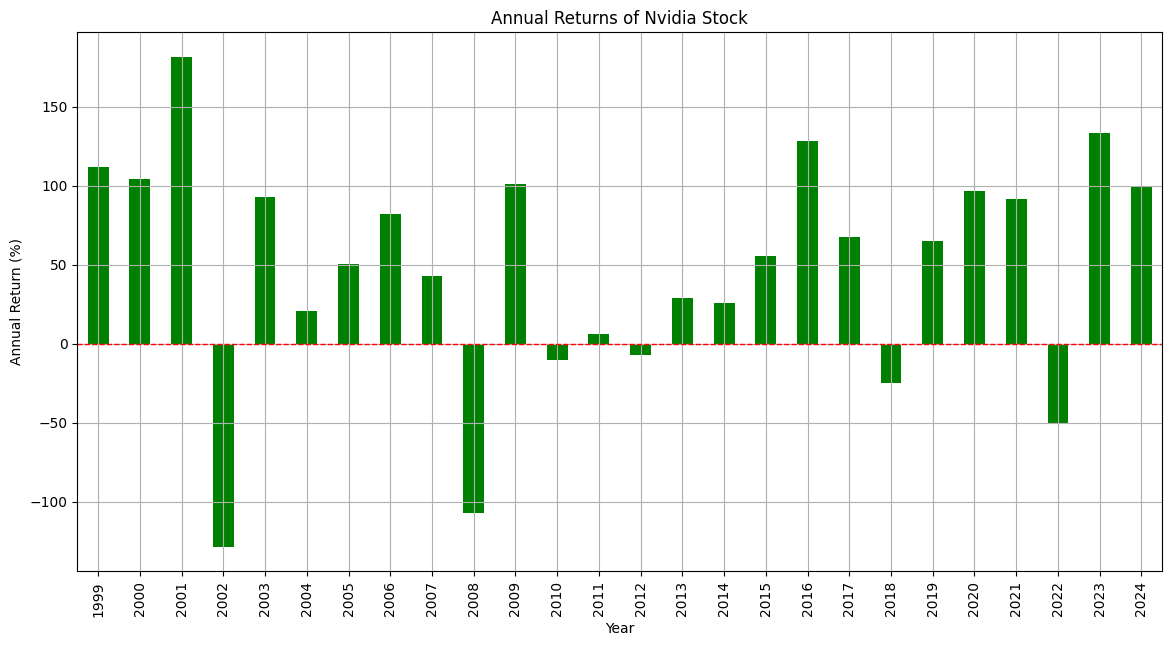

In [19]:
def plot_annual_returns(df):
    df['Year'] = df.index.year
    annual_returns = df.groupby('Year')['Daily Return'].sum() * 100  # Convert to percentage

    plt.figure(figsize=(14, 7))
    annual_returns.plot(kind='bar', color='green')
    plt.title('Annual Returns of Nvidia Stock')
    plt.xlabel('Year')
    plt.ylabel('Annual Return (%)')
    plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
    plt.grid()
    plt.show()

plot_annual_returns(df)

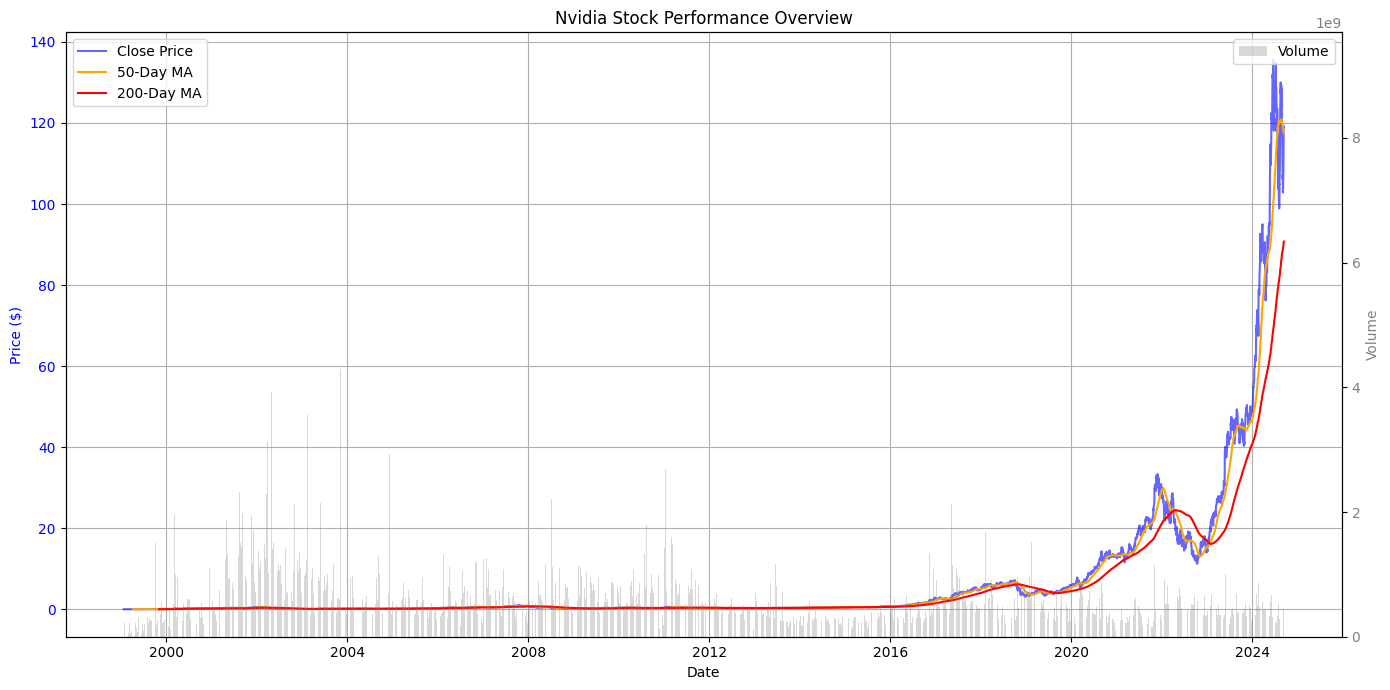

In [20]:
def stakeholder_visualization(df):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot closing price and moving averages
    ax1.plot(df['Close'], label='Close Price', color='blue', alpha=0.6)
    ax1.plot(df['MA50'], label='50-Day MA', color='orange', linewidth=1.5)
    ax1.plot(df['MA200'], label='200-Day MA', color='red', linewidth=1.5)
    
    ax1.set_title('Nvidia Stock Performance Overview')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a second y-axis for volume
    ax2 = ax1.twinx()  
    ax2.bar(df.index, df['Volume'], color='grey', alpha=0.3, label='Volume')
    ax2.set_ylabel('Volume', color='grey')
    ax2.tick_params(axis='y', labelcolor='grey')

    # Adding gridlines and legends
    ax1.grid()
    fig.tight_layout()  
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

stakeholder_visualization(df)